<a href="https://colab.research.google.com/github/nat-20/Seguimiento/blob/main/Copia_de_Nuevo_ModeloMulticapa_RCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras import models

from numpy import argmax

In [ ]:

%%capture
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1l2fel55cI79Rpa8rZVyPHkbLkgt6PSvB' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1l2fel55cI79Rpa8rZVyPHkbLkgt6PSvB" -O data.csv && rm -rf /tmp/cookies.txt

In [ ]:
df = pd.read_csv('data.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.88791,0.096987,0.011308,0.003415,0.000304,0.000000,0.000076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.05,0,0,30.0
1,0.88966,0.095242,0.011535,0.003263,0.000228,0.000076,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.05,0,0,30.0
2,0.88617,0.098581,0.010852,0.004098,0.000228,0.000076,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.05,0,0,30.0
3,0.89413,0.093193,0.009259,0.003187,0.000076,0.000076,0.000076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.97,0,0,30.0
4,0.89171,0.093420,0.010245,0.004174,0.000152,0.000228,0.000076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.97,0,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,0.99211,0.007741,0.000152,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.13,270,9,50.0
2405,0.98945,0.010473,0.000076,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.13,270,9,50.0
2406,0.99105,0.008803,0.000076,0.000076,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.13,270,9,50.0
2407,0.98975,0.010169,0.000076,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.13,270,9,50.0


In [ ]:
df[19].unique()

array([30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. ,
       35.5, 36. , 37.5, 50. ])

In [ ]:
#Separación por escenarios

df_B2B=df.iloc[0:987,:] #Back to back

df_fiber_0=df.iloc[988:1520,:] #Con fibra a 0dBm

df_fiber_9=df.iloc[1521:,:] #Con fibra a 9dBm

#df_fiber=df.iloc[988:,:] #Con fibra

In [ ]:
data=df_fiber_0
data = data.sample(frac=1)
variables=17
num = 3
X=data.iloc[:,0:variables].values #Variables
y=data.iloc[:,19:20].values #etiquetas
list_X=list(range(variables))
def foldnumber(i):
  if i==0:
    X_train = X[0:(len(data)//3)*2]
    y_train = y[0:(len(data)//3)*2]
    X_test = X[(len(data)//3)*2:(len(data)//3)*3]
    y_test = y[(len(data)//3)*2:(len(data)//3)*3]
  elif i==1:
    X_train = X[(len(data)//3):]
    y_train = y[(len(data)//3):]
    X_test = X[0:(len(data)//3)]
    y_test = y[0:(len(data)//3)]
  elif i==2:
    X_train = np.concatenate((X[0:(len(data)//3)], X[(len(data)//3)*2:(len(data)//3)*3]))
    y_train = np.concatenate((y[0:(len(data)//3)], y[(len(data)//3)*2:(len(data)//3)*3]))
    X_test = X[(len(data)//3):(len(data)//3)*2]
    y_test = y[(len(data)//3):(len(data)//3)*2]

  return (X_train,y_train,X_test,y_test)

for i in range(3):
  X_train,y_train,X_test,y_test = foldnumber(i)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  print("Primera etapa - fold #",i)
  y_copy = y_train.copy()
  for fil in range (len(y_copy)):
      if(y_copy[fil]<=40):
          y_copy[fil]=1 #Se asigna 1 a los valores que no son 50 para aumentar la cantidad de umbrales posibles que se podrían definir

  #Primera red neuronal
  callback = EarlyStopping(monitor='loss', patience=20, mode='min',restore_best_weights=True)
  model = Sequential()
  model.add(Dense(units=64, input_dim=len(list_X),  activation='relu'))
  model.add(Dense(units=32, activation='tanh'))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_absolute_error', optimizer='adam')
  history_1 = model.fit (X_train, y_copy, epochs=2000, batch_size=32, callbacks=[callback],
                      verbose=0)
  print(len(history_1.history['loss']))
  Train_predictions_1=model.predict(X_train)
  TrainData_1=pd.DataFrame(data=y_copy, columns=['ICI'])
  TrainData_1['PreICI']=Train_predictions_1
  TrainData_1['aprox']=TrainData_1['PreICI']

  Train_error_absoluto_medio_1=mean_absolute_error(TrainData_1['ICI'],TrainData_1['PreICI'])

  #Guardar pesos primera capa
  model.save('model_capa_1.h5')

  for fil in range (TrainData_1.shape[0]):
      if(TrainData_1['PreICI'][fil]<=2.8):
          TrainData_1['aprox'][fil]=1
      else:
          TrainData_1['aprox'][fil]=50

  error_train_1=0
  for fil in range (TrainData_1.shape[0]):
      if(TrainData_1['aprox'][fil]!=TrainData_1['ICI'][fil]):
          error_train_1+=1

  print('el error de esta etapa es: ',error_train_1/len(y_copy))

  TrainData_1['Original']=y_train
  print(TrainData_1)

  print("Segunda etapa - fold #",i)
  #%%ETAPA 2 CLASIFICADOR
  #Separando los datos con interferencia igual a 37.5 GHz de las demás
  pos_50=[x[0] for x in np.argwhere(np.asarray(TrainData_1['ICI'])==50.0)]
  pos_other=[x[0] for x in np.argwhere(np.asarray(TrainData_1['ICI'])!=50.0)]

  X_50=X_train[pos_50]
  y_50=y_train[pos_50]
  X_other=X_train[pos_other]
  y_other=y_train[pos_other]

  y_copy_2 = y_other.copy()
  for fil in range (len(y_copy_2)):
      if(y_copy_2[fil]<=36.2):
          y_copy_2[fil]=0
      else:
          y_copy_2[fil]=1

  callback = EarlyStopping(monitor='loss', patience=300, mode='min',restore_best_weights=True)
  model = Sequential()
  model.add(Dense(units=1024, input_dim=len(list_X),  activation='relu'))
  model.add(Dense(units=512, activation='tanh'))
  model.add(Dense(units=256, activation='sigmoid'))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
  history_2 = model.fit (X_other, y_copy_2, epochs=5000, batch_size=32, callbacks=[callback],
                      verbose=0)
  print(len(history_2.history['loss']))
  Train_predictions_2_1=model.predict(X_other)

  Train_predictions_2_1 = argmax(Train_predictions_2_1, axis=-1).astype('int')
  acc = accuracy_score(y_copy_2, Train_predictions_2_1)

  print('El error de esta etapa es: ',1-acc)

  #Guardar pesos segunda capa
  model.save('model_capa_2.h5')

  TrainData_2_1=pd.DataFrame(data=y_copy_2, columns=['ORGINAL'])
  TrainData_2_1['PreICI']=Train_predictions_2_1

  print(TrainData_2_1)

  TrainData_2_1['ERROR']= np.abs(TrainData_2_1['PreICI']-TrainData_2_1['ORGINAL'])

  error_absoluto_medio_1=mean_absolute_error(TrainData_2_1['ORGINAL'],TrainData_2_1['PreICI'])

  print('tercera etapa - fold #',i)
  #%% TERCERA ETAPA
  pos_30_36=[x[0] for x in np.argwhere(Train_predictions_2_1==0)]
  pos_37=[x[0] for x in np.argwhere(Train_predictions_2_1==1)]

  X_with=X_other[pos_30_36]
  y_with=y_other[pos_30_36]
  X_without=X_other[pos_37]
  y_without=y_other[pos_37]

  pos_without_2=[]
  pos_without_3=[]
  pos_without_50=[]

  # pos_with_2=[]
  # for i in pos_37:
  #     if y_other[i]<36.5 and y_other[i]>=35.5:
  #         pos_without_2.append(i)
  #     elif (y_other[i]>36.5 and y_other[i]<40):
  #         pos_without_3.append(i)
  #     else:
  #         pos_without_50.append(i)

  # for i in pos_30_36:
  #     if y_other[i]<35.2:
  #         pos_with_2.append(i)

  # X_without_2=X_other[pos_without_2]
  # y_without_2=y_other[pos_without_2]
  # X_without_3=X_other[pos_without_3]
  # y_without_3=y_other[pos_without_3]
  # X_with_2=X_other[pos_with_2]
  # y_with_2=y_other[pos_with_2]

  #ETAPA 3 - 1 -> 30 - 36 GHz
  callback = EarlyStopping(monitor='loss', patience=300, mode='min',restore_best_weights=True)
  model = Sequential()
  model.add(Dense(units=1024, input_dim=len(list_X),  activation='relu'))
  model.add(Dense(units=512, activation='tanh'))
  model.add(Dense(units=256, activation='sigmoid'))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mean_absolute_error', optimizer='Adam')
  history_3 = model.fit (X_with, y_with, epochs=5000, batch_size=32, callbacks=[callback],
                      verbose=0)
  print(len(history_3.history['loss']))
  Train_predictions_2_1=model.predict(X_with)

  TrainData_2_1=pd.DataFrame(data=y_with, columns=['ORGINAL'])

  TrainData_2_1['PreICI']=Train_predictions_2_1

  #print(TrainData_2_1)

  #Guardar pesos tercera capa
  model.save('model_capa_3_1.h5')

  TrainData_2_1['ERROR']= np.abs(TrainData_2_1['PreICI']-TrainData_2_1['ORGINAL'])

  error_absoluto_medio_2=mean_absolute_error(TrainData_2_1['ORGINAL'],TrainData_2_1['PreICI'])
  print(TrainData_2_1)
  print('The Mean Absolute Error of ANN model is:', error_absoluto_medio_2)
  print('=========================================================================================================================================================================/n/n')

  #%% Test
  #Primera etapa
  new_model = models.load_model('model_capa_1.h5')

  prediction_1 = new_model.predict(X_test)

  TestData_2_2=pd.DataFrame(data=y_test, columns=['ORIGINAL'])

  TestData_2_2['PreICI_1']=prediction_1

  for fil in range (TestData_2_2.shape[0]):
      if(TestData_2_2['PreICI_1'][fil]<=3):
          TestData_2_2['PreICI_1'][fil]=1
      else:
          TestData_2_2['PreICI_1'][fil]=50


  y_copy = y_test.copy()
  for fil in range (len(y_copy)):
      if(y_copy[fil]<=40):
          y_copy[fil]=1

  acc_1 = accuracy_score(y_copy, TestData_2_2['PreICI_1'])
  print('El error de la primera etapa es: ',(1-acc_1)*100,' %')


  #Segunda Etapa
  aciertos_50=0
  falsos_50=0
  for fil in range (TestData_2_2.shape[0]):
      if(TestData_2_2['PreICI_1'][fil]==TestData_2_2['ORIGINAL'][fil]):
          aciertos_50+=1
      if (TestData_2_2['PreICI_1'][fil]!=TestData_2_2['ORIGINAL'][fil] and TestData_2_2['PreICI_1'][fil]==50):
          falsos_50+=1

  pos_50_test=[x[0] for x in np.argwhere(np.asarray(TestData_2_2['PreICI_1'])==50.0)]
  pos_other_test=[x[0] for x in np.argwhere(np.asarray(TestData_2_2['PreICI_1'])!=50.0)]

  test_pred=[0]*len(y_test)

  for i in pos_50_test:
      test_pred[i]=TestData_2_2['PreICI_1'][i]

  X_other_test=X_test[pos_other_test]
  y_other_test=y_test[pos_other_test]

  new_model_2 = models.load_model('model_capa_2.h5')

  prediction_2 = new_model_2.predict(X_other_test)

  prediction_2 = argmax(prediction_2, axis=-1).astype('int')

  y_copy = y_test[pos_other_test].copy()
  for fil in range (len(y_copy)):
      if(y_copy[fil]<=36.2):
          y_copy[fil]=0
      else:
          y_copy[fil]=1
  test_pred.append(prediction_2)
  #test_test.append(y_test[pos_other_test])

  acc_2 = accuracy_score(y_copy, prediction_2)
  print('El error de la segunda etapa con los datos de prueba es: ',(1-acc_2)*100, ' %')

  #Tercera Etapa
  pos_with_test=[x[0] for x in np.argwhere(prediction_2==0)]
  pos_without_test=[x[0] for x in np.argwhere(prediction_2==1)]

  list_0=[pos_other_test[i] for i in pos_with_test]
  list_1=[pos_other_test[i] for i in pos_without_test]

  X_with_test=X_other_test[pos_with_test]
  X_without_test=X_other_test[pos_without_test]
  y_without_test=y_other_test[pos_without_test]

  #Datos con interferencia
  new_model_3_1 = models.load_model('model_capa_3_1.h5')
  prediction_3_1 = new_model_3_1.predict(X_with_test)

  error_absoluto_medio_3=mean_absolute_error(y_other_test[pos_with_test],prediction_3_1)

  print('El error absoluto medio de la tercera etapa con los datos de prueba con interferencia es: ',error_absoluto_medio_3)

  j=0
  for i in list_0:
      test_pred[i]=prediction_3_1[j]
      j+=1

  # #Datos sin interfencia
  # new_model_3=models.load_model('model_capa_3.h5')
  # prediction_3 = new_model_3.predict(X_without_test)
  # prediction_3 = argmax(prediction_3, axis=-1).astype('int')

  # y_copy = y_other_test[pos_without_test].copy()

  # for fil in range (len(y_copy)):
  #     if(y_copy[fil]<=36):
  #         y_copy[fil]=0
  #     else:
  #         y_copy[fil]=1

  # acc_3 = accuracy_score(y_copy, prediction_3)
  # print('El error de la tercera etapa con los datos de prueba sin interferencia separando entre 37.5 y los restantes es: ',acc_3)

  # #Etapa cuatro
  # pos_without_4=[x[0] for x in np.argwhere(prediction_3==0)]
  # pos_without_5=[x[0] for x in np.argwhere(prediction_3==1)]

  # list_4=[list_1[i] for i in pos_without_4]
  # list_5=[list_1[i] for i in pos_without_5]

  # j=0
  # for i in list_5:
  #     test_pred[i]=37.5
  #     j+=1

  # X_with_test_4=X_without_test[pos_without_4]
  # #X_without_test_4=X_other_test[pos_without_4]

  # new_model_3_2 = models.load_model('model_capa_3_2.h5')
  # prediction_3_2 = new_model_3_2.predict(X_with_test_4)

  # j=0
  # for i in list_4:
  #     test_pred[i]=prediction_3_2[j]
  #     j+=1

  # error_absoluto_medio_4=mean_absolute_error(y_without_test[pos_without_4],prediction_3_2)
  # print('El error absoluto medio de la cuarta etapa es: ',error_absoluto_medio_4)

  print('=========================================================================================================================================================================')
  print('=========================================================================================================================================================================')
  print('=========================================================================================================================================================================')
  print('=========================================================================================================================================================================')

Primera etapa - fold # 0
520
12/12 [==============================] - 0s 2ms/step


<ipython-input-8-02d292d24bb7>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData_1['aprox'][fil]=1
<ipython-input-8-02d292d24bb7>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData_1['aprox'][fil]=50


el error de esta etapa es:  0.025423728813559324
      ICI     PreICI  aprox  Original
0    50.0   1.071981    1.0      50.0
1    50.0  50.076397   50.0      50.0
2     1.0   1.038695    1.0      35.0
3     1.0   1.050215    1.0      31.5
4     1.0   1.034285    1.0      35.5
..    ...        ...    ...       ...
349  50.0  50.076397   50.0      50.0
350   1.0   1.033824    1.0      31.5
351   1.0   1.029272    1.0      35.5
352   1.0   1.027991    1.0      31.0
353   1.0   1.035236    1.0      36.0

[354 rows x 4 columns]
Segunda etapa - fold # 0
886
10/10 [==============================] - 0s 5ms/step
El error de esta etapa es:  0.012578616352201255
     ORGINAL  PreICI
0        0.0       0
1        0.0       0
2        0.0       0
3        0.0       0
4        0.0       0
..       ...     ...
313      0.0       0
314      0.0       0
315      0.0       0
316      0.0       0
317      0.0       0

[318 rows x 2 columns]
tercera etapa - fold # 0
2893
10/10 [===========================

<ipython-input-8-02d292d24bb7>:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData_2_2['PreICI_1'][fil]=1
<ipython-input-8-02d292d24bb7>:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData_2_2['PreICI_1'][fil]=50


5/5 [==============================] - 0s 4ms/step
El error de la segunda etapa con los datos de prueba es:  7.189542483660127  %
5/5 [==============================] - 0s 4ms/step
El error absoluto medio de la tercera etapa con los datos de prueba con interferencia es:  0.5971340125715229
Primera etapa - fold # 1
435
12/12 [==============================] - 0s 2ms/step
el error de esta etapa es:  0.016901408450704224
      ICI     PreICI  aprox  Original
0     1.0   0.999146    1.0      32.0
1     1.0   0.987269    1.0      34.5
2    50.0  49.952068   50.0      50.0
3     1.0   0.996594    1.0      35.0
4     1.0   0.983200    1.0      35.0
..    ...        ...    ...       ...
350   1.0   0.999300    1.0      33.5
351   1.0   0.998473    1.0      30.5
352   1.0   0.988266    1.0      35.5
353   1.0   1.015413    1.0      31.0
354   1.0   1.010117    1.0      32.5

[355 rows x 4 columns]
Segunda etapa - fold # 1


<ipython-input-8-02d292d24bb7>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData_1['aprox'][fil]=1
<ipython-input-8-02d292d24bb7>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData_1['aprox'][fil]=50


1465
10/10 [==============================] - 0s 4ms/step
El error de esta etapa es:  0.015923566878980888
     ORGINAL  PreICI
0        0.0       0
1        0.0       0
2        0.0       0
3        0.0       0
4        0.0       0
..       ...     ...
309      0.0       0
310      0.0       0
311      0.0       0
312      0.0       0
313      0.0       0

[314 rows x 2 columns]
tercera etapa - fold # 1
4049
9/9 [==============================] - 0s 3ms/step
     ORGINAL     PreICI     ERROR
0       32.0  32.004318  0.004318
1       34.5  34.534271  0.034271
2       35.0  35.023270  0.023270
3       35.0  34.999897  0.000103
4       32.0  32.003860  0.003860
..       ...        ...       ...
282     33.5  33.502842  0.002842
283     30.5  30.506157  0.006157
284     35.5  35.508675  0.008675
285     31.0  31.184969  0.184969
286     32.5  32.507233  0.007233

[287 rows x 3 columns]
The Mean Absolute Error of ANN model is: 0.05127329942656726
===========================================

<ipython-input-8-02d292d24bb7>:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData_2_2['PreICI_1'][fil]=1
<ipython-input-8-02d292d24bb7>:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData_2_2['PreICI_1'][fil]=50


6/6 [==============================] - 0s 4ms/step
El error de la segunda etapa con los datos de prueba es:  7.185628742514972  %
5/5 [==============================] - 0s 4ms/step
El error absoluto medio de la tercera etapa con los datos de prueba con interferencia es:  0.8940572923229587
Primera etapa - fold # 2
553
12/12 [==============================] - 0s 2ms/step
el error de esta etapa es:  0.014124293785310734
      ICI     PreICI  aprox  Original
0    50.0   9.681083   50.0      50.0
1    50.0  50.018932   50.0      50.0
2     1.0   1.009304    1.0      35.0
3     1.0   0.974974    1.0      31.5
4     1.0   1.001395    1.0      35.5
..    ...        ...    ...       ...
349  50.0  50.018932   50.0      50.0
350   1.0   1.005424    1.0      33.5
351   1.0   1.002613    1.0      30.5
352   1.0   1.011487    1.0      35.5
353   1.0   1.007068    1.0      31.0

[354 rows x 4 columns]
Segunda etapa - fold # 

<ipython-input-8-02d292d24bb7>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData_1['aprox'][fil]=50
<ipython-input-8-02d292d24bb7>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData_1['aprox'][fil]=1


2
1675
10/10 [==============================] - 0s 3ms/step
El error de esta etapa es:  0.012779552715655007
     ORGINAL  PreICI
0        0.0       0
1        0.0       0
2        0.0       0
3        0.0       0
4        0.0       0
..       ...     ...
308      0.0       0
309      0.0       0
310      0.0       0
311      0.0       0
312      0.0       0

[313 rows x 2 columns]
tercera etapa - fold # 2
2891
10/10 [==============================] - 0s 3ms/step
     ORGINAL     PreICI     ERROR
0       35.0  34.443085  0.556915
1       31.5  31.492180  0.007820
2       35.5  35.506798  0.006798
3       31.0  31.492104  0.492104
4       32.0  32.001286  0.001286
..       ...        ...       ...
285     35.0  35.015331  0.015331
286     33.5  33.511612  0.011612
287     30.5  31.492105  0.992105
288     35.5  35.259251  0.240749
289     31.0  30.992029  0.007971

[290 rows x 3 columns]
The Mean Absolute Error of ANN model is: 0.1814036796832907
========================================

<ipython-input-8-02d292d24bb7>:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData_2_2['PreICI_1'][fil]=1
<ipython-input-8-02d292d24bb7>:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData_2_2['PreICI_1'][fil]=50


5/5 [==============================] - 0s 6ms/step
El error de la segunda etapa con los datos de prueba es:  4.402515723270439  %
5/5 [==============================] - 0s 4ms/step
El error absoluto medio de la tercera etapa con los datos de prueba con interferencia es:  0.29501380120124016


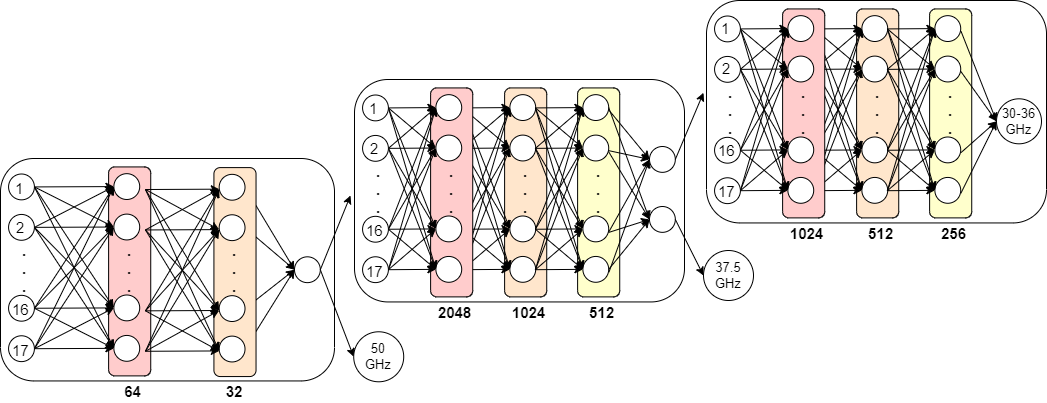

In [ ]:
data=df_fiber_0
# print(data)
# data = data.sample(frac=1)
# print(data)
variables=17

#Separando variables
X=data.iloc[:].values #Variables

y=data.iloc[:,19:20].values #etiquetas

list_X=list(range(variables))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=5)
print('X_train length: ',X_train.shape)
print('y_train length: ',y_train.shape)
print('X_test length: ',X_test.shape)
print('y_test length: ',y_test.shape)

#Estandarización de las variables de entrada
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Etapa 1
#Separando los datos con interferencia igual a 50 GHz de las demás
y_copy = y_train.copy()
for fil in range (len(y_copy)):
    if(y_copy[fil]<=40):
        y_copy[fil]=1 #Se asigna 1 a los valores que no son 50 para aumentar la cantidad de umbrales posibles que se podrían definir

#Primera red neuronal
callback = EarlyStopping(monitor='loss', patience=20, mode='min',restore_best_weights=True)
model = Sequential()
model.add(Dense(units=64, input_dim=len(list_X),  activation='relu'))
model.add(Dense(units=32, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_error', optimizer='adam')
history_1 = model.fit (X_train, y_copy, epochs=2000, batch_size=32, callbacks=[callback],
                    verbose=0)
print(len(history_1.history['loss']))
Train_predictions_1=model.predict(X_train)
TrainData_1=pd.DataFrame(data=y_copy, columns=['ICI'])
TrainData_1['PreICI']=Train_predictions_1
TrainData_1['aprox']=TrainData_1['PreICI']

Train_error_absoluto_medio_1=mean_absolute_error(TrainData_1['ICI'],TrainData_1['PreICI'])

#Guardar pesos primera capa
model.save('model_capa_1.h5')

for fil in range (TrainData_1.shape[0]):
    if(TrainData_1['PreICI'][fil]<=3):
        TrainData_1['aprox'][fil]=1
    else:
        TrainData_1['aprox'][fil]=50

error_train_1=0
for fil in range (TrainData_1.shape[0]):
    if(TrainData_1['aprox'][fil]!=TrainData_1['ICI'][fil]):
        error_train_1+=1

print('el error de esta etapa es: ',error_train_1/len(y_copy))

TrainData_1['Original']=y_train
print(TrainData_1)

609
12/12 [==============================] - 0s 2ms/step
el error de esta etapa es:  0.014124293785310734
      ICI     PreICI  aprox  Original
0     1.0   1.001121    1.0      32.0
1     1.0   1.005584    1.0      35.5
2     1.0   0.983747    1.0      32.5
3    50.0  49.630703   50.0      50.0
4     1.0   1.001370    1.0      33.0
..    ...        ...    ...       ...
349   1.0   1.004797    1.0      31.0
350   1.0   1.006292    1.0      34.5
351   1.0   1.006219    1.0      33.5
352   1.0   1.019318    1.0      35.5
353  50.0  50.053925   50.0      50.0

[354 rows x 4 columns]


<ipython-input-51-06263426e122>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData_1['aprox'][fil]=1
<ipython-input-51-06263426e122>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TrainData_1['aprox'][fil]=50


In [ ]:
#%%ETAPA 2 CLASIFICADOR
#Separando los datos con interferencia igual a 37.5 GHz de las demás
pos_50=[x[0] for x in np.argwhere(np.asarray(TrainData_1['ICI'])==50.0)]
pos_other=[x[0] for x in np.argwhere(np.asarray(TrainData_1['ICI'])!=50.0)]

X_50=X_train[pos_50]
y_50=y_train[pos_50]
X_other=X_train[pos_other]
y_other=y_train[pos_other]

y_copy_2 = y_other.copy()
for fil in range (len(y_copy_2)):
    if(y_copy_2[fil]<=36.2):
        y_copy_2[fil]=0
    else:
        y_copy_2[fil]=1

callback = EarlyStopping(monitor='loss', patience=300, mode='min',restore_best_weights=True)
model = Sequential()
model.add(Dense(units=1024, input_dim=len(list_X),  activation='relu'))
model.add(Dense(units=512, activation='tanh'))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
history_2 = model.fit (X_other, y_copy_2, epochs=5000, batch_size=32, callbacks=[callback],
                    verbose=0)
print(len(history_2.history['loss']))
Train_predictions_2_1=model.predict(X_other)

Train_predictions_2_1 = argmax(Train_predictions_2_1, axis=-1).astype('int')
acc = accuracy_score(y_copy_2, Train_predictions_2_1)

print('El error de esta etapa es: ',1-acc)

#Guardar pesos segunda capa
model.save('model_capa_2.h5')

TrainData_2_1=pd.DataFrame(data=y_copy_2, columns=['ORGINAL'])
TrainData_2_1['PreICI']=Train_predictions_2_1

print(TrainData_2_1)

TrainData_2_1['ERROR']= np.abs(TrainData_2_1['PreICI']-TrainData_2_1['ORGINAL'])

error_absoluto_medio_1=mean_absolute_error(TrainData_2_1['ORGINAL'],TrainData_2_1['PreICI'])

1543
11/11 [==============================] - 0s 5ms/step
El error de esta etapa es:  0.0119760479041916
     ORGINAL  PreICI
0        0.0       0
1        1.0       1
2        0.0       0
3        0.0       0
4        0.0       0
..       ...     ...
329      0.0       0
330      0.0       0
331      0.0       0
332      0.0       0
333      0.0       0

[334 rows x 2 columns]


In [ ]:
error_train_2_1=0
ceros=0
unos=0
for i in range (len(TrainData_2_1)):
     if (TrainData_2_1['PreICI'][i] != TrainData_2_1['ORGINAL'][i]):
         error_train_2_1=error_train_2_1+1
         if (TrainData_2_1['ORGINAL'][i] == 0):
           ceros=ceros+1
         else:
           unos=unos+1

print('El error de entrenamiento es: ', error_train_2_1/len(TrainData_2_1))

El error de entrenamiento es:  0.011976047904191617


In [ ]:
#%% TERCERA ETAPA
pos_30_36=[x[0] for x in np.argwhere(Train_predictions_2_1==0)]
pos_37=[x[0] for x in np.argwhere(Train_predictions_2_1==1)]

X_with=X_other[pos_30_36]
y_with=y_other[pos_30_36]
X_without=X_other[pos_37]
y_without=y_other[pos_37]

pos_without_2=[]
pos_without_3=[]
pos_without_50=[]

# pos_with_2=[]
# for i in pos_37:
#     if y_other[i]<36.5 and y_other[i]>=35.5:
#         pos_without_2.append(i)
#     elif (y_other[i]>36.5 and y_other[i]<40):
#         pos_without_3.append(i)
#     else:
#         pos_without_50.append(i)

# for i in pos_30_36:
#     if y_other[i]<35.2:
#         pos_with_2.append(i)

# X_without_2=X_other[pos_without_2]
# y_without_2=y_other[pos_without_2]
# X_without_3=X_other[pos_without_3]
# y_without_3=y_other[pos_without_3]
# X_with_2=X_other[pos_with_2]
# y_with_2=y_other[pos_with_2]

#ETAPA 3 - 1 -> 30 - 36 GHz
callback = EarlyStopping(monitor='loss', patience=300, mode='min',restore_best_weights=True)
model = Sequential()
model.add(Dense(units=1024, input_dim=len(list_X),  activation='relu'))
model.add(Dense(units=512, activation='tanh'))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_error', optimizer='Adam')
history_3 = model.fit (X_with, y_with, epochs=5000, batch_size=32, callbacks=[callback],
                    verbose=0)
print(len(history_3.history['loss']))
Train_predictions_2_1=model.predict(X_with)

TrainData_2_1=pd.DataFrame(data=y_with, columns=['ORGINAL'])

TrainData_2_1['PreICI']=Train_predictions_2_1

#print(TrainData_2_1)

#Guardar pesos tercera capa
model.save('model_capa_3_1.h5')

TrainData_2_1['ERROR']= np.abs(TrainData_2_1['PreICI']-TrainData_2_1['ORGINAL'])

error_absoluto_medio_2=mean_absolute_error(TrainData_2_1['ORGINAL'],TrainData_2_1['PreICI'])

print('The Mean Absolute Error of ANN model is:', error_absoluto_medio_2)

5000
10/10 [==============================] - 1s 65ms/step
The Mean Absolute Error of ANN model is: 0.06406772442353077


In [ ]:
def custom_round(x, base):
    return base * round(float(x)/base)

def aprox(TestingData):
    for fil in range (TestingData.shape[0]):
        if((TestingData['Aprox'][fil]>=30) & (TestingData['Aprox'][fil]<=36)):
            TestingData['new'][fil]=TestingData['Aprox'][fil]
        if(TestingData['Aprox'][fil]<30):
            TestingData['new'][fil]=30
        elif(TestingData['Aprox'][fil]==36.5):
            TestingData['new'][fil]=36
        elif((TestingData['new'][fil]>=37) & (TestingData['new'][fil]<=40)):
            TestingData['new'][fil]=37.5
        elif(TestingData['new'][fil]>40):
            TestingData['new'][fil]=50

In [ ]:
TrainData_2_1['Aprox']=TrainData_2_1['PreICI'].apply(lambda x: custom_round(x, base=0.5))

TrainData_2_1['new']=TrainData_2_1['Aprox']

aprox(TrainData_2_1)
TrainData_2_1

<ipython-input-12-19f63d5800f5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestingData['new'][fil]=TestingData['Aprox'][fil]


,ORGINAL,PreICI,ERROR,Aprox,new
0,31.0,31.006311,0.006311,31.0,31.0
1,35.5,35.502300,0.002300,35.5,35.5
2,34.0,34.490711,0.490711,34.5,34.5
3,34.5,34.502625,0.002625,34.5,34.5
4,35.5,35.499817,0.000183,35.5,35.5
...,...,...,...,...,...
307,33.0,32.509979,0.490021,32.5,32.5
308,31.5,31.503244,0.003244,31.5,31.5
309,32.0,32.000305,0.000305,32.0,32.0
310,36.0,35.989990,0.010010,36.0,36.0


In [ ]:
error_train_2_1=0
for i in range (len(TrainData_2_1)):
     if (TrainData_2_1['new'][i] != TrainData_2_1['ORGINAL'][i]):
         error_train_2_1=error_train_2_1+1
print('El error de entrenamiento es: ', error_train_2_1/len(TrainData_2_1))

El error de entrenamiento es:  0.07371794871794872


In [ ]:
#%% Test
#Primera etapa
new_model = models.load_model('model_capa_1.h5')

prediction_1 = new_model.predict(X_test)

TestData_2_2=pd.DataFrame(data=y_test, columns=['ORIGINAL'])

TestData_2_2['PreICI_1']=prediction_1

for fil in range (TestData_2_2.shape[0]):
    if(TestData_2_2['PreICI_1'][fil]<=3):
        TestData_2_2['PreICI_1'][fil]=1
    else:
        TestData_2_2['PreICI_1'][fil]=50


y_copy = y_test.copy()
for fil in range (len(y_copy)):
    if(y_copy[fil]<=40):
        y_copy[fil]=1

acc_1 = accuracy_score(y_copy, TestData_2_2['PreICI_1'])
print('El error de la primera etapa es: ',(1-acc_1)*100,' %')


#Segunda Etapa
aciertos_50=0
falsos_50=0
for fil in range (TestData_2_2.shape[0]):
    if(TestData_2_2['PreICI_1'][fil]==TestData_2_2['ORIGINAL'][fil]):
        aciertos_50+=1
    if (TestData_2_2['PreICI_1'][fil]!=TestData_2_2['ORIGINAL'][fil] and TestData_2_2['PreICI_1'][fil]==50):
        falsos_50+=1

pos_50_test=[x[0] for x in np.argwhere(np.asarray(TestData_2_2['PreICI_1'])==50.0)]
pos_other_test=[x[0] for x in np.argwhere(np.asarray(TestData_2_2['PreICI_1'])!=50.0)]

test_pred=[0]*len(y_test)

for i in pos_50_test:
    test_pred[i]=TestData_2_2['PreICI_1'][i]

X_other_test=X_test[pos_other_test]
y_other_test=y_test[pos_other_test]

new_model_2 = models.load_model('model_capa_2.h5')

prediction_2 = new_model_2.predict(X_other_test)

prediction_2 = argmax(prediction_2, axis=-1).astype('int')

y_copy = y_test[pos_other_test].copy()
for fil in range (len(y_copy)):
    if(y_copy[fil]<=36.2):
        y_copy[fil]=0
    else:
        y_copy[fil]=1
test_pred.append(prediction_2)
#test_test.append(y_test[pos_other_test])

acc_2 = accuracy_score(y_copy, prediction_2)
print('El error de la segunda etapa con los datos de prueba es: ',(1-acc_2)*100, ' %')

#Tercera Etapa
pos_with_test=[x[0] for x in np.argwhere(prediction_2==0)]
pos_without_test=[x[0] for x in np.argwhere(prediction_2==1)]

list_0=[pos_other_test[i] for i in pos_with_test]
list_1=[pos_other_test[i] for i in pos_without_test]

X_with_test=X_other_test[pos_with_test]
X_without_test=X_other_test[pos_without_test]
y_without_test=y_other_test[pos_without_test]

#Datos con interferencia
new_model_3_1 = models.load_model('model_capa_3_1.h5')
prediction_3_1 = new_model_3_1.predict(X_with_test)

error_absoluto_medio_3=mean_absolute_error(y_other_test[pos_with_test],prediction_3_1)

print('El error absoluto medio de la tercera etapa con los datos de prueba con interferencia es: ',error_absoluto_medio_3)

j=0
for i in list_0:
    test_pred[i]=prediction_3_1[j]
    j+=1

# #Datos sin interfencia
# new_model_3=models.load_model('model_capa_3.h5')
# prediction_3 = new_model_3.predict(X_without_test)
# prediction_3 = argmax(prediction_3, axis=-1).astype('int')

# y_copy = y_other_test[pos_without_test].copy()

# for fil in range (len(y_copy)):
#     if(y_copy[fil]<=36):
#         y_copy[fil]=0
#     else:
#         y_copy[fil]=1

# acc_3 = accuracy_score(y_copy, prediction_3)
# print('El error de la tercera etapa con los datos de prueba sin interferencia separando entre 37.5 y los restantes es: ',acc_3)

# #Etapa cuatro
# pos_without_4=[x[0] for x in np.argwhere(prediction_3==0)]
# pos_without_5=[x[0] for x in np.argwhere(prediction_3==1)]

# list_4=[list_1[i] for i in pos_without_4]
# list_5=[list_1[i] for i in pos_without_5]

# j=0
# for i in list_5:
#     test_pred[i]=37.5
#     j+=1

# X_with_test_4=X_without_test[pos_without_4]
# #X_without_test_4=X_other_test[pos_without_4]

# new_model_3_2 = models.load_model('model_capa_3_2.h5')
# prediction_3_2 = new_model_3_2.predict(X_with_test_4)

# j=0
# for i in list_4:
#     test_pred[i]=prediction_3_2[j]
#     j+=1

# error_absoluto_medio_4=mean_absolute_error(y_without_test[pos_without_4],prediction_3_2)
# print('El error absoluto medio de la cuarta etapa es: ',error_absoluto_medio_4)

5/5 [==============================] - 2s 477ms/step


<ipython-input-15-cd45277c9edd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData_2_2['PreICI_1'][fil]=1
<ipython-input-15-cd45277c9edd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestData_2_2['PreICI_1'][fil]=50


El error de la primera etapa es:  0.6249999999999978  %
5/5 [==============================] - 3s 609ms/step
El error de la segunda etapa con los datos de prueba es:  2.857142857142858  %
5/5 [==============================] - 0s 4ms/step
El error absoluto medio de la tercera etapa con los datos de prueba con interferencia es:  0.3363452733949173


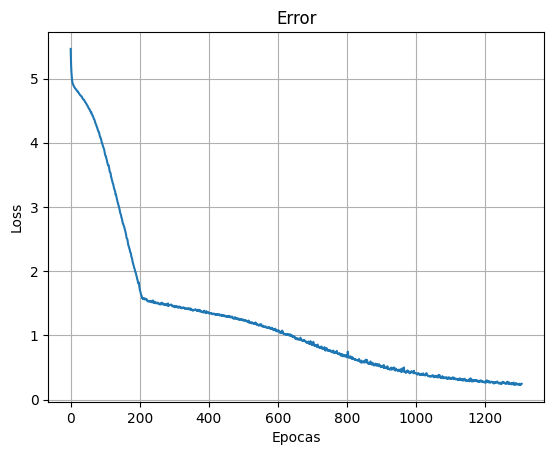

In [ ]:
# plot training history
plt.plot(history_1.history['loss'], label='train')
#plt.plot(Predictions.Predictions['loss'], label='test')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.title('Error')
plt.grid('on')
plt.show()

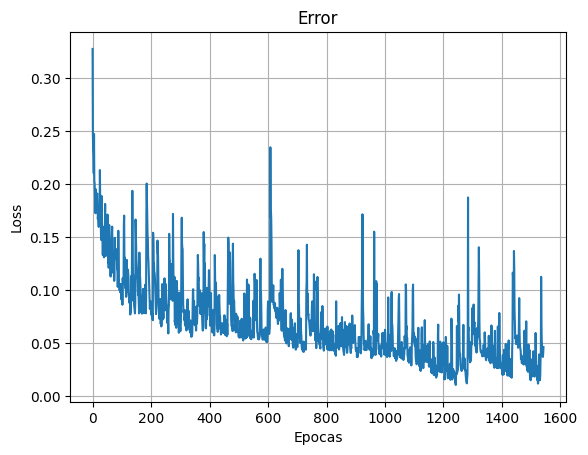

In [ ]:
# plot training history
plt.plot(history_2.history['loss'], label='train')
#plt.plot(Predictions.Predictions['loss'], label='test')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.title('Error')
plt.grid('on')
plt.show()

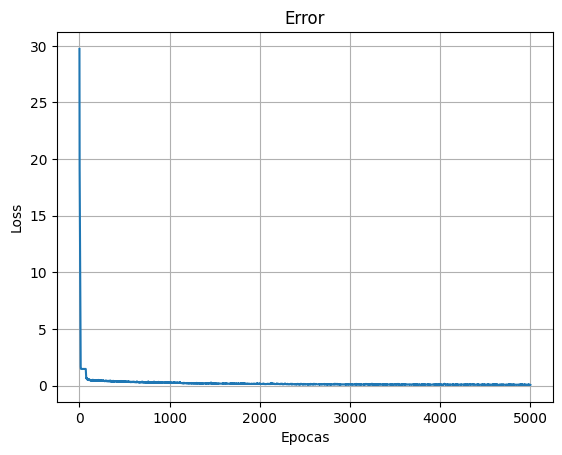

In [ ]:
# plot training history
plt.plot(history_3.history['loss'], label='train')
#plt.plot(Predictions.Predictions['loss'], label='test')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.title('Error')
plt.grid('on')
plt.show()